In [487]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
box_out_df = pd.read_csv('shots_with_boxouts.csv')
player_map_df = pd.read_csv("players.csv")

In [488]:
team_map = {
    1610612761: 'Raptors',
    1610612766: 'Hornets',
    # Add more as needed
}

# Player ID to Name mapping (replace with actual player ID-name pairs)


In [489]:
player_map_df

,player name,position,playerid
0,James Johnson,F,201949
1,Luis Scola,F,2449
2,DeMarre Carroll,F,201960
3,Cory Joseph,G,202709
4,Kyle Lowry,G,200768
5,Bismack Biyombo,C-F,202687
6,DeMar DeRozan,G,201942
7,Jonas Valanciunas,C,202685
8,Bruno Caboclo,F,203998
9,Terrence Ross,F-G,203082


In [490]:
player_id_to_name_dict = player_map_df.set_index('playerid')['player name'].to_dict()

In [491]:
player_id_to_position_dict = player_map_df.set_index('playerid')['position'].to_dict()

In [492]:
player_id_to_name_dict

{201949: 'James Johnson',
 2449: 'Luis Scola',
 201960: 'DeMarre Carroll',
 202709: 'Cory Joseph',
 200768: 'Kyle Lowry',
 202687: 'Bismack Biyombo',
 201942: 'DeMar DeRozan',
 202685: 'Jonas Valanciunas',
 203998: 'Bruno Caboclo',
 203082: 'Terrence Ross',
 202335: 'Patrick Patterson',
 1626153: 'Delon Wright',
 203512: 'Lucas Nogueira',
 101107: 'Marvin Williams',
 203087: 'Jeremy Lamb',
 201587: 'Nicolas Batum',
 202391: 'Jeremy Lin',
 1626151: 'Aaron Harrison',
 202689: 'Kemba Walker',
 203798: 'PJ Hairston',
 203148: 'Brian Roberts',
 203584: 'Troy Daniels',
 203469: 'Cody Zeller',
 1626163: 'Frank Kaminsky',
 201946: 'Tyler Hansbrough',
 201150: 'Spencer Hawes'}

In [493]:
box_out_df['Boxer Team Name'] = box_out_df['Boxer Team'].map(team_map)
box_out_df['Target Team Name'] = box_out_df['Target Team'].map(team_map)

# Convert player IDs
box_out_df['Boxer Name'] = box_out_df['Boxer ID'].map(player_id_to_name_dict)
box_out_df['Target Name'] = box_out_df['Target ID'].map(player_id_to_name_dict)

box_out_df['Boxer Position'] = box_out_df['Boxer ID'].map(player_id_to_position_dict)
box_out_df['Target Position'] = box_out_df['Target ID'].map(player_id_to_position_dict)

In [494]:
box_out_df

,Quarter,Game Clock (s),Basket,Boxer ID,Target ID,Boxer Team,Target Team,Boxer Distance to Basket (ft),Target Distance to Basket (ft),Distance Between Players (ft),Boxer Team Name,Target Team Name,Boxer Name,Target Name,Boxer Position,Target Position
0,Q1,701.50,Left,201587,202685,1610612766,1610612761,4.97,5.34,1.33,Hornets,Raptors,Nicolas Batum,Jonas Valanciunas,G-F,C
1,Q1,686.03,Right,200768,201587,1610612761,1610612766,11.98,12.92,4.58,Raptors,Hornets,Kyle Lowry,Nicolas Batum,G,G-F
2,Q1,686.03,Right,203469,202685,1610612766,1610612761,1.12,5.76,4.74,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C
3,Q1,667.39,Left,203469,202685,1610612766,1610612761,3.44,4.18,1.54,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C
4,Q1,659.28,Right,203469,200768,1610612766,1610612761,9.10,10.96,1.91,Hornets,Raptors,Cody Zeller,Kyle Lowry,C-F,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Q4,20.10,Left,202685,203469,1610612761,1610612766,7.25,10.60,4.14,Raptors,Hornets,Jonas Valanciunas,Cody Zeller,C,C-F
285,Q4,16.30,Right,203469,202685,1610612766,1610612761,6.68,8.84,3.42,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C
286,Q4,16.30,Right,101107,203082,1610612766,1610612761,6.85,9.32,4.00,Hornets,Raptors,Marvin Williams,Terrence Ross,F,F-G
287,Q4,6.90,Left,101107,203082,1610612766,1610612761,14.49,16.16,2.55,Hornets,Raptors,Marvin Williams,Terrence Ross,F,F-G


In [495]:
box_out_df = box_out_df.drop(columns=["Boxer ID", "Target ID", "Boxer Team", "Target Team"])

In [496]:
box_out_df

,Quarter,Game Clock (s),Basket,Boxer Distance to Basket (ft),Target Distance to Basket (ft),Distance Between Players (ft),Boxer Team Name,Target Team Name,Boxer Name,Target Name,Boxer Position,Target Position
0,Q1,701.50,Left,4.97,5.34,1.33,Hornets,Raptors,Nicolas Batum,Jonas Valanciunas,G-F,C
1,Q1,686.03,Right,11.98,12.92,4.58,Raptors,Hornets,Kyle Lowry,Nicolas Batum,G,G-F
2,Q1,686.03,Right,1.12,5.76,4.74,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C
3,Q1,667.39,Left,3.44,4.18,1.54,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C
4,Q1,659.28,Right,9.10,10.96,1.91,Hornets,Raptors,Cody Zeller,Kyle Lowry,C-F,G
...,...,...,...,...,...,...,...,...,...,...,...,...
284,Q4,20.10,Left,7.25,10.60,4.14,Raptors,Hornets,Jonas Valanciunas,Cody Zeller,C,C-F
285,Q4,16.30,Right,6.68,8.84,3.42,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C
286,Q4,16.30,Right,6.85,9.32,4.00,Hornets,Raptors,Marvin Williams,Terrence Ross,F,F-G
287,Q4,6.90,Left,14.49,16.16,2.55,Hornets,Raptors,Marvin Williams,Terrence Ross,F,F-G


In [497]:
box_out_df["Boxer Position"].value_counts()

Boxer Position
C-F    80
F      73
G      72
C      38
F-G    17
G-F     9
Name: count, dtype: int64

In [498]:
box_out_df["Target Position"].value_counts()

Target Position
F      84
G      69
C      53
C-F    53
G-F    17
F-G    13
Name: count, dtype: int64

In [499]:
def get_shooting_side(row):
    if row['Quarter'] in ['Q1', 'Q2']:
        if row['Boxer Team Name'] == 'Raptors':
            return "Offense" if row["Basket"] == "Left" else "Defense"
        else:
            return "Offense" if row["Basket"] == "Right" else "Defense"
    else:
        if row['Boxer Team Name'] == 'Hornets':
            return "Offense" if row["Basket"] == "Left" else "Defense"
        else:
            return "Offense" if row["Basket"] == "Right" else "Defense"

box_out_df['Box Out Side'] = box_out_df.apply(get_shooting_side, axis=1)

### Player Comparison

In [500]:
def get_shooting_side(row):
    if row['Quarter'] in ['Q1', 'Q2']:
        if row['Boxer Team Name'] == 'Raptors':
            return "Offense" if row["Basket"] == "Left" else "Defense"
        else:
            return "Offense" if row["Basket"] == "Right" else "Defense"
    else:
        if row['Boxer Team Name'] == 'Hornets':
            return "Offense" if row["Basket"] == "Left" else "Defense"
        else:
            return "Offense" if row["Basket"] == "Right" else "Defense"

box_out_df['Box Out Side'] = box_out_df.apply(get_shooting_side, axis=1)

In [501]:
box_out_df

,Quarter,Game Clock (s),Basket,Boxer Distance to Basket (ft),Target Distance to Basket (ft),Distance Between Players (ft),Boxer Team Name,Target Team Name,Boxer Name,Target Name,Boxer Position,Target Position,Box Out Side
0,Q1,701.50,Left,4.97,5.34,1.33,Hornets,Raptors,Nicolas Batum,Jonas Valanciunas,G-F,C,Defense
1,Q1,686.03,Right,11.98,12.92,4.58,Raptors,Hornets,Kyle Lowry,Nicolas Batum,G,G-F,Defense
2,Q1,686.03,Right,1.12,5.76,4.74,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C,Offense
3,Q1,667.39,Left,3.44,4.18,1.54,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C,Defense
4,Q1,659.28,Right,9.10,10.96,1.91,Hornets,Raptors,Cody Zeller,Kyle Lowry,C-F,G,Offense
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Q4,20.10,Left,7.25,10.60,4.14,Raptors,Hornets,Jonas Valanciunas,Cody Zeller,C,C-F,Defense
285,Q4,16.30,Right,6.68,8.84,3.42,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C,Defense
286,Q4,16.30,Right,6.85,9.32,4.00,Hornets,Raptors,Marvin Williams,Terrence Ross,F,F-G,Defense
287,Q4,6.90,Left,14.49,16.16,2.55,Hornets,Raptors,Marvin Williams,Terrence Ross,F,F-G,Offense


In [502]:
box_outs = box_out_df.groupby('Boxer Name').agg(
    box_out_count=('Target Name', 'count'),
    most_common_target=('Target Name', lambda x: x.value_counts().idxmax()),
    most_common_target_count=('Target Name', lambda x: x.value_counts().max()),
    offense_count=('Box Out Side', lambda x: (x == 'Offense').sum()),
    defense_count=('Box Out Side', lambda x: (x == 'Defense').sum())
).reset_index()
box_outs

,Boxer Name,box_out_count,most_common_target,most_common_target_count,offense_count,defense_count
0,Bismack Biyombo,38,Tyler Hansbrough,18,19,19
1,Brian Roberts,5,Patrick Patterson,1,2,3
2,Cody Zeller,42,Jonas Valanciunas,20,14,28
3,Cory Joseph,11,Jeremy Lamb,5,5,6
4,DeMar DeRozan,21,PJ Hairston,4,10,11
5,DeMarre Carroll,10,Kemba Walker,3,6,4
6,Frank Kaminsky,17,Jonas Valanciunas,5,7,10
7,James Johnson,2,Nicolas Batum,1,1,1
8,Jeremy Lamb,8,Patrick Patterson,3,5,3
9,Jonas Valanciunas,21,Cody Zeller,11,7,14


In [503]:
boxed_out = box_out_df.groupby('Target Name').agg(
    times_boxed_out=('Boxer Name', 'count'),
    most_common_boxer=('Boxer Name', lambda x: x.value_counts().idxmax()),
    most_common_boxer_count=('Boxer Name', lambda x: x.value_counts().max())
).reset_index()
boxed_out

,Target Name,times_boxed_out,most_common_boxer,most_common_boxer_count
0,Bismack Biyombo,22,Tyler Hansbrough,13
1,Brian Roberts,3,Bismack Biyombo,1
2,Cody Zeller,31,Bismack Biyombo,12
3,Cory Joseph,9,Tyler Hansbrough,3
4,DeMar DeRozan,13,Marvin Williams,4
5,DeMarre Carroll,12,Cody Zeller,5
6,Frank Kaminsky,17,Kyle Lowry,5
7,James Johnson,3,Nicolas Batum,2
8,Jeremy Lamb,14,Cory Joseph,5
9,Jonas Valanciunas,36,Cody Zeller,20


In [504]:
player_summary = pd.merge(
    box_outs, boxed_out, left_on='Boxer Name', right_on='Target Name', how='outer'
).fillna({
    'box_out_count': 0,
    'most_common_target': '',
    'most_common_target_count': 0,
    'left_side_count': 0,
    'right_side_count': 0,
    'times_boxed_out': 0,
    'most_common_boxer': '',
    'most_common_boxer_count': 0
})
player_summary = player_summary.rename(columns={
    'Boxer Name': 'Player Name'
}).drop(columns=['Target Name'])
player_summary = player_summary[[
    'Player Name', 'box_out_count', 'most_common_target', 'most_common_target_count',
    'offense_count', 'defense_count', 'times_boxed_out', 'most_common_boxer', 'most_common_boxer_count'
]]
player_summary

,Player Name,box_out_count,most_common_target,most_common_target_count,offense_count,defense_count,times_boxed_out,most_common_boxer,most_common_boxer_count
0,Bismack Biyombo,38,Tyler Hansbrough,18,19,19,22,Tyler Hansbrough,13
1,Brian Roberts,5,Patrick Patterson,1,2,3,3,Bismack Biyombo,1
2,Cody Zeller,42,Jonas Valanciunas,20,14,28,31,Bismack Biyombo,12
3,Cory Joseph,11,Jeremy Lamb,5,5,6,9,Tyler Hansbrough,3
4,DeMar DeRozan,21,PJ Hairston,4,10,11,13,Marvin Williams,4
5,DeMarre Carroll,10,Kemba Walker,3,6,4,12,Cody Zeller,5
6,Frank Kaminsky,17,Jonas Valanciunas,5,7,10,17,Kyle Lowry,5
7,James Johnson,2,Nicolas Batum,1,1,1,3,Nicolas Batum,2
8,Jeremy Lamb,8,Patrick Patterson,3,5,3,14,Cory Joseph,5
9,Jonas Valanciunas,21,Cody Zeller,11,7,14,36,Cody Zeller,20


/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/2447895879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_summary, x='box_out_count', y='Player Name', palette='Blues_d')


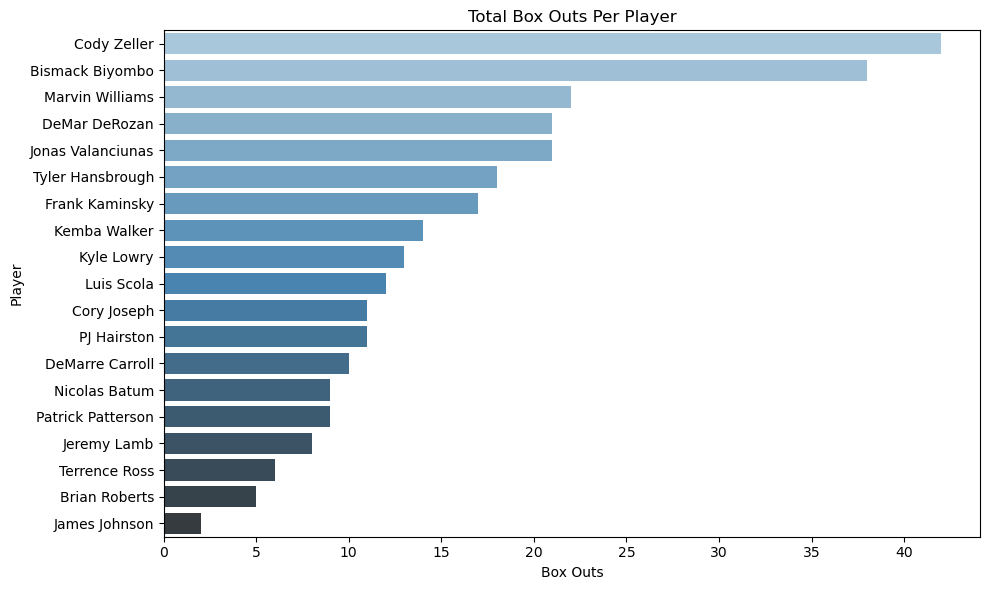

<Figure size 640x480 with 0 Axes>

In [505]:
sorted_summary = player_summary.sort_values('box_out_count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_summary, x='box_out_count', y='Player Name', palette='Blues_d')
plt.title('Total Box Outs Per Player')
plt.xlabel('Box Outs')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

plt.savefig('total_box_outs_per_player.png') # You can change the filename and extension

plt.show()

/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/1353302996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_summary, x='times_boxed_out', y='Player Name', palette='Reds_d')


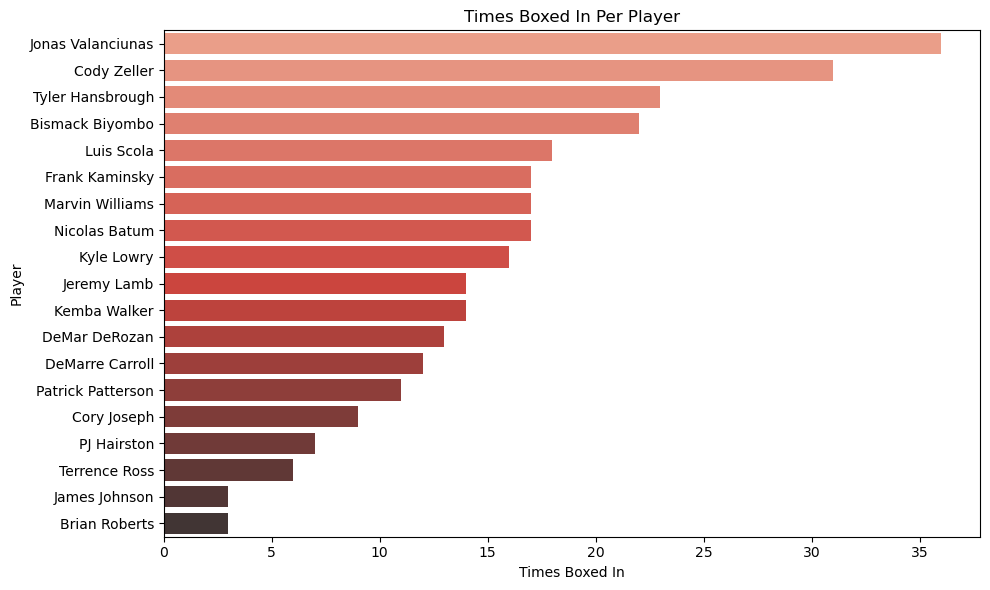

In [506]:
sorted_summary = player_summary.sort_values('times_boxed_out', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_summary, x='times_boxed_out', y='Player Name', palette='Reds_d')
plt.title('Times Boxed In Per Player')
plt.xlabel('Times Boxed In')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


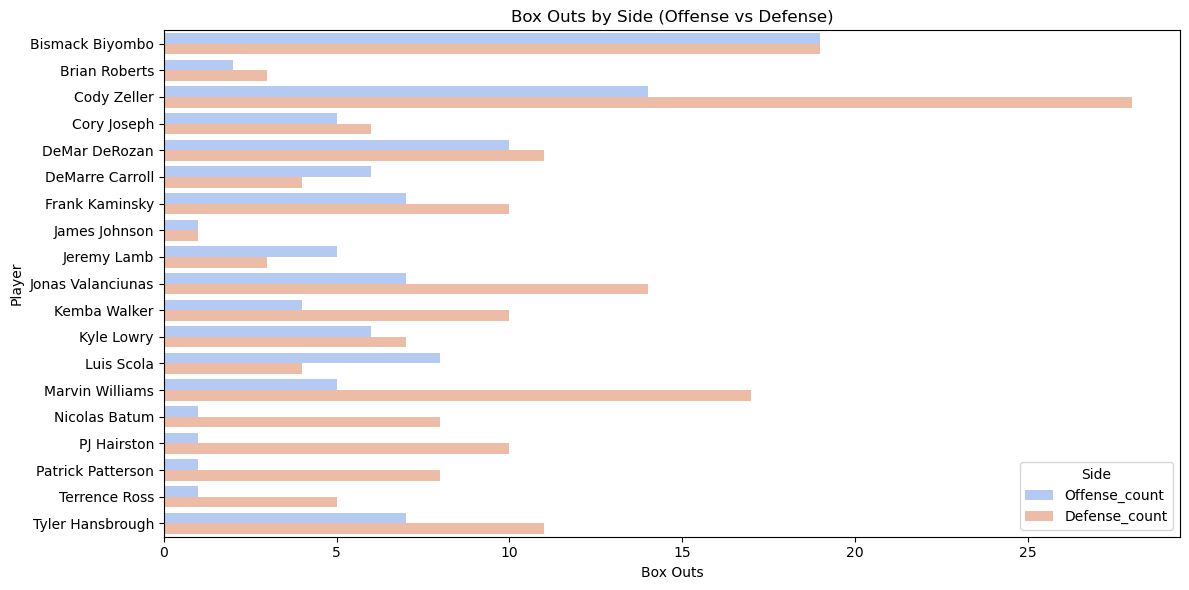

In [507]:
side_counts = player_summary[['Player Name', 'offense_count', 'defense_count']].melt(
    id_vars='Player Name', var_name='Side', value_name='Count'
)

side_counts['Side'] = side_counts['Side'].str.replace('_side_count', '').str.capitalize()

plt.figure(figsize=(12, 6))
sns.barplot(data=side_counts, x='Count', y='Player Name', hue='Side', palette='coolwarm')
plt.title('Box Outs by Side (Offense vs Defense)')
plt.xlabel('Box Outs')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

In [508]:
boxer_pos_target = box_out_df.groupby(['Boxer Name', 'Target Position']).size().reset_index(name='count')
most_boxed_position = boxer_pos_target.sort_values(['Boxer Name', 'count'], ascending=[True, False]) \
    .groupby('Boxer Name').first().reset_index()
most_boxed_position = most_boxed_position.rename(columns={
    'Target Position': 'Most Boxed Target Position',
    'count': 'Boxed Target Count'
})
most_boxed_position

,Boxer Name,Most Boxed Target Position,Boxed Target Count
0,Bismack Biyombo,F,18
1,Brian Roberts,F,2
2,Cody Zeller,C,20
3,Cory Joseph,G,6
4,DeMar DeRozan,G,6
5,DeMarre Carroll,G,3
6,Frank Kaminsky,F,7
7,James Johnson,F,1
8,Jeremy Lamb,F,3
9,Jonas Valanciunas,C-F,11


In [509]:
target_pos_boxer = box_out_df.groupby(['Target Name', 'Boxer Position']).size().reset_index(name='count')
most_boxed_by_position = target_pos_boxer.sort_values(['Target Name', 'count'], ascending=[True, False]) \
    .groupby('Target Name').first().reset_index()
most_boxed_by_position = most_boxed_by_position.rename(columns={
    'Target Name': 'Player Name',
    'Boxer Position': 'Most Frequent Boxer Position',
    'count': 'Boxed By Count'
})
most_boxed_by_position

,Player Name,Most Frequent Boxer Position,Boxed By Count
0,Bismack Biyombo,F,14
1,Brian Roberts,G,2
2,Cody Zeller,C-F,12
3,Cory Joseph,F,3
4,DeMar DeRozan,F,4
5,DeMarre Carroll,C-F,5
6,Frank Kaminsky,G,7
7,James Johnson,G-F,2
8,Jeremy Lamb,G,8
9,Jonas Valanciunas,C-F,20


In [510]:
player_position_summary = pd.merge(
    most_boxed_position, 
    most_boxed_by_position, 
    left_on='Boxer Name', 
    right_on='Player Name', 
    how='outer'
)

# Clean up column order
player_position_summary = player_position_summary[[
    'Boxer Name', 'Most Boxed Target Position', 'Boxed Target Count',
    'Most Frequent Boxer Position', 'Boxed By Count'
]]

# Fill NaNs for players that only boxed or were only targets
player_position_summary = player_position_summary.fillna({
    'Most Boxed Target Position': '—',
    'Boxed Target Count': 0,
    'Most Frequent Boxer Position': '—',
    'Boxed By Count': 0
})

player_position_summary

,Boxer Name,Most Boxed Target Position,Boxed Target Count,Most Frequent Boxer Position,Boxed By Count
0,Bismack Biyombo,F,18,F,14
1,Brian Roberts,F,2,G,2
2,Cody Zeller,C,20,C-F,12
3,Cory Joseph,G,6,F,3
4,DeMar DeRozan,G,6,F,4
5,DeMarre Carroll,G,3,C-F,5
6,Frank Kaminsky,F,7,G,7
7,James Johnson,F,1,G-F,2
8,Jeremy Lamb,F,3,G,8
9,Jonas Valanciunas,C-F,11,C-F,20


In [511]:
boxer_counts = box_out_df['Boxer Name'].value_counts().rename('Box Out Count')
target_counts = box_out_df['Target Name'].value_counts().rename('Boxed Out Count')

# Combine
player_success = pd.concat([boxer_counts, target_counts], axis=1).fillna(0)
player_success['Total Events'] = player_success['Box Out Count'] + player_success['Boxed Out Count']
player_success['Box Out Success Rate (%)'] = (player_success['Box Out Count'] / player_success['Total Events']) * 100

# Get player position
boxer_positions = box_out_df.groupby('Boxer Name')['Boxer Position'].agg(lambda x: x.mode().iloc[0])
target_positions = box_out_df.groupby('Target Name')['Target Position'].agg(lambda x: x.mode().iloc[0])
player_positions = boxer_positions.combine_first(target_positions)
player_success = player_success.merge(player_positions.rename('Player Position'), left_index=True, right_index=True)

# Reset index
player_success = player_success.reset_index().rename(columns={'index': 'Player Name'})
player_success = player_success.sort_values('Box Out Success Rate (%)', ascending=False)
player_success

,Player Name,Box Out Count,Boxed Out Count,Total Events,Box Out Success Rate (%),Player Position
1,Bismack Biyombo,38,22,60,63.333333,C-F
17,Brian Roberts,5,3,8,62.500000,G
4,DeMar DeRozan,21,13,34,61.764706,G
10,PJ Hairston,11,7,18,61.111111,F-G
0,Cody Zeller,42,31,73,57.534247,C-F
2,Marvin Williams,22,17,39,56.410256,F
11,Cory Joseph,11,9,20,55.000000,G
6,Frank Kaminsky,17,17,34,50.000000,C
7,Kemba Walker,14,14,28,50.000000,G
16,Terrence Ross,6,6,12,50.000000,F-G


In [512]:
team_box = box_out_df['Boxer Team Name'].value_counts().rename('Box Out Count')
team_target = box_out_df['Target Team Name'].value_counts().rename('Boxed Out Count')

team_success = pd.concat([team_box, team_target], axis=1).fillna(0)
team_success['Total Events'] = team_success['Box Out Count'] + team_success['Boxed Out Count']
team_success['Box Out Success Rate (%)'] = (team_success['Box Out Count'] / team_success['Total Events']) * 100

team_success = team_success.reset_index().rename(columns={'index': 'Team Name'})
team_success.sort_values('Box Out Success Rate (%)', ascending=False)

,Team Name,Box Out Count,Boxed Out Count,Total Events,Box Out Success Rate (%)
0,Hornets,146,143,289,50.519031
1,Raptors,143,146,289,49.480969


### Position Comparison

In [513]:
position_boxing = box_out_df.groupby(['Boxer Position', 'Target Position']).size().reset_index(name='count')

# Normalize by Boxer Position (what % of G's box outs are against C, etc.)
position_boxing['pct_of_boxer_pos'] = position_boxing.groupby('Boxer Position')['count'].transform(lambda x: x / x.sum())

position_boxing.sort_values("count", ascending=False)

,Boxer Position,Target Position,count,pct_of_boxer_pos
26,G,G,30,0.416667
8,C-F,F,27,0.337500
6,C-F,C,24,0.300000
13,F,F,21,0.287671
24,G,F,17,0.236111
7,C-F,C-F,16,0.200000
12,F,C-F,16,0.219178
15,F,G,16,0.219178
1,C,C-F,11,0.289474
2,C,F,11,0.289474


In [514]:
most_common_target_pos = position_boxing.sort_values(['Boxer Position', 'count'], ascending=[True, False])\
    .groupby('Boxer Position').first().reset_index()
most_common_target_pos

,Boxer Position,Target Position,count,pct_of_boxer_pos
0,C,C-F,11,0.289474
1,C-F,F,27,0.337500
2,F,F,21,0.287671
3,F-G,C,7,0.411765
4,G,G,30,0.416667
5,G-F,F,5,0.555556


In [515]:
position_getting_boxed = box_out_df.groupby(['Target Position', 'Boxer Position']).size().reset_index(name='count')
position_getting_boxed['pct_of_target_pos'] = position_getting_boxed.groupby('Target Position')['count'].transform(lambda x: x / x.sum())

most_common_boxer_pos = position_getting_boxed.sort_values(['Target Position', 'count'], ascending=[True, False])\
    .groupby('Target Position').first().reset_index()

most_common_boxer_pos

,Target Position,Boxer Position,count,pct_of_target_pos
0,C,C-F,24,0.452830
1,C-F,C-F,16,0.301887
2,F,C-F,27,0.321429
3,F-G,G,7,0.538462
4,G,G,30,0.434783
5,G-F,F,10,0.588235


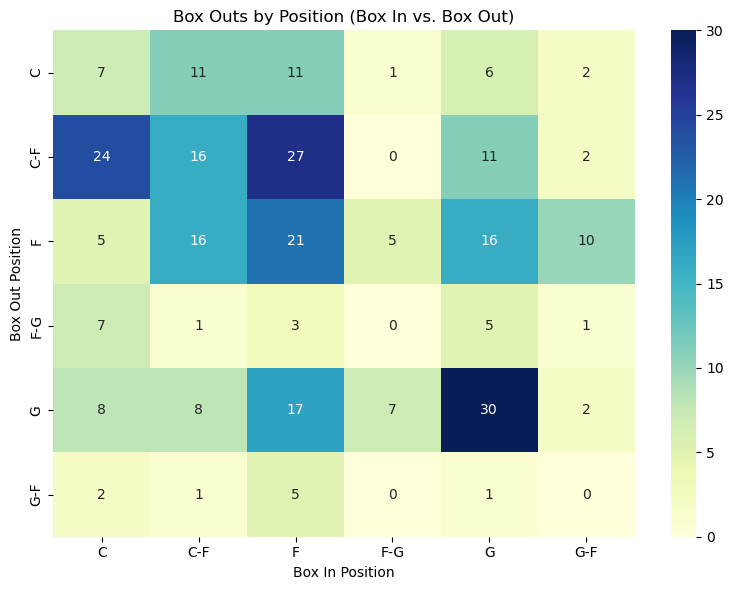

In [516]:
pivot_table = position_boxing.pivot(index="Boxer Position", columns="Target Position", values="count").fillna(0)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt="g", cmap="YlGnBu")
plt.title("Box Outs by Position (Box In vs. Box Out)")
plt.xlabel("Box In Position")
plt.ylabel("Box Out Position")
plt.tight_layout()
plt.show()

In [517]:
box_counts = box_out_df.groupby(['Boxer Team Name', 'Boxer Position', 'Target Position']).size().reset_index(name='Count')

# Total per team+boxer position
box_totals = box_counts.groupby(['Boxer Team Name', 'Boxer Position'])['Count'].transform('sum')

# Add percentage column
box_counts['Percentage'] = (box_counts['Count'] / box_totals) * 100

# Pivot table
pivot_boxer = box_counts.pivot_table(
    index=['Boxer Team Name', 'Boxer Position'],
    columns='Target Position',
    values='Percentage',
    fill_value=0,
    aggfunc='first'
).round(1)

pivot_boxer

Target Position                    C   C-F     F   F-G     G   G-F
Boxer Team Name Boxer Position                                    
Hornets         C               29.4   0.0  41.2   5.9  23.5   0.0
                C-F             47.6   9.5  21.4   0.0  21.4   0.0
                F                5.0  35.0  30.0   5.0  25.0   0.0
                F-G             54.5   0.0  18.2   0.0  27.3   0.0
                G                3.7  11.1  33.3  11.1  40.7   0.0
                G-F             22.2  11.1  55.6   0.0  11.1   0.0
Raptors         C                9.5  52.4  19.0   0.0   9.5   9.5
                C-F             10.5  31.6  47.4   0.0   5.3   5.3
                F                9.1   6.1  27.3   9.1  18.2  30.3
                F-G             16.7  16.7  16.7   0.0  33.3  16.7
                G               15.6  11.1  17.8   8.9  42.2   4.4

In [518]:
box_out_df[box_out_df["Boxer Team Name"] == "Raptors"]["Boxer Position"].unique()

array(['G', 'F', 'C', 'C-F', 'F-G'], dtype=object)

In [519]:
hornets = pivot_boxer.loc['Hornets']
raptors = pivot_boxer.loc['Raptors']

# Subtract Raptors from Hornets
diff = hornets - raptors
diff

Target Position,C,C-F,F,F-G,G,G-F
Boxer Position,,,,,,
C,19.9,-52.4,22.2,5.9,14.0,-9.5
C-F,37.1,-22.1,-26.0,0.0,16.1,-5.3
F,-4.1,28.9,2.7,-4.1,6.8,-30.3
F-G,37.8,-16.7,1.5,0.0,-6.0,-16.7
G,-11.9,0.0,15.5,2.2,-1.5,-4.4
G-F,NaN,NaN,NaN,NaN,NaN,NaN


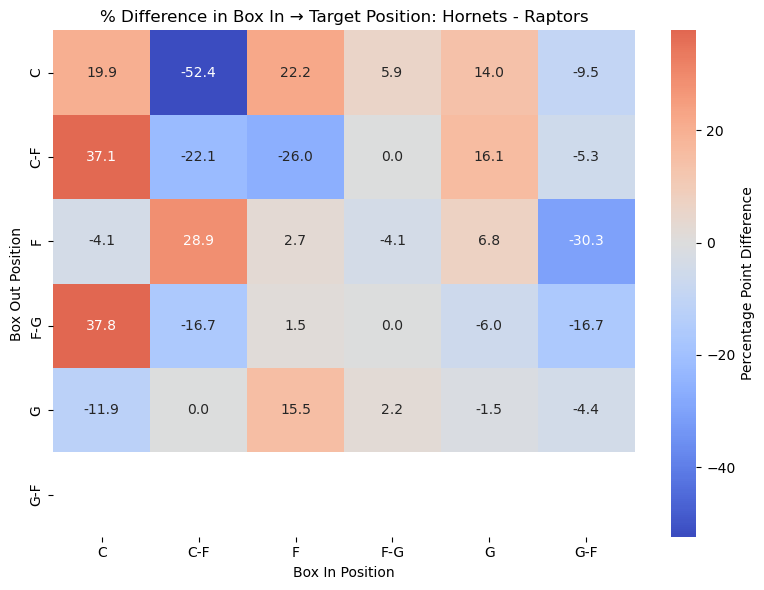

In [520]:
plt.figure(figsize=(8, 6))
sns.heatmap(diff, annot=True, cmap="coolwarm", center=0, fmt=".1f", cbar_kws={'label': 'Percentage Point Difference'})
plt.title(f"% Difference in Box In → Target Position: {team1} - {team2}")
plt.xlabel("Box In Position")
plt.ylabel("Box Out Position")
plt.tight_layout()
plt.show()

#Positive good for Hornets

/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/3276720283.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


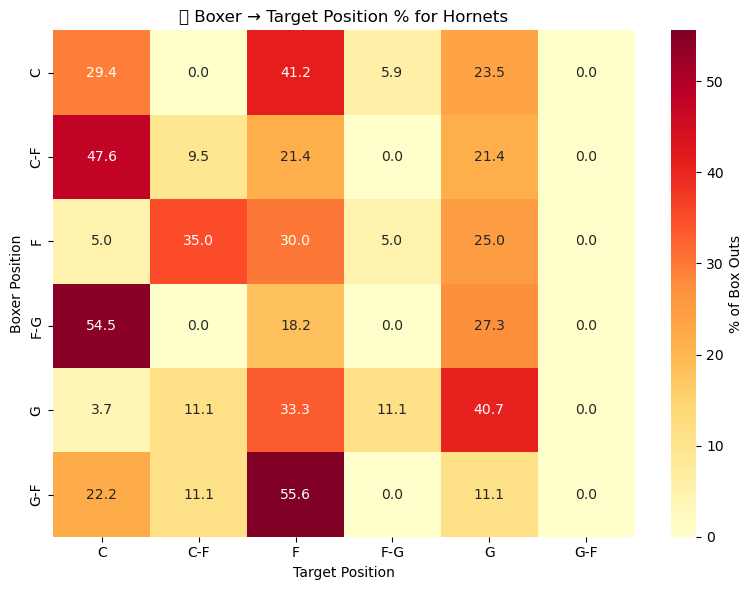

/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/3276720283.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


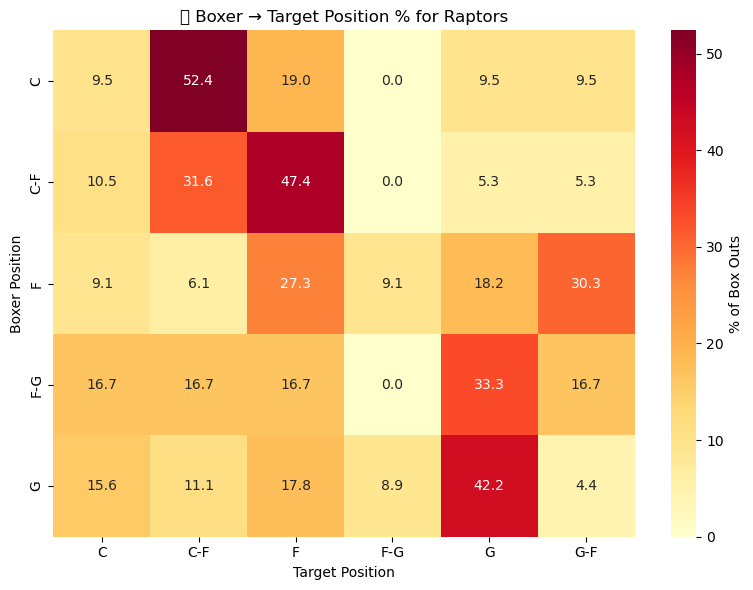

In [521]:
for team in pivot_boxer.index.get_level_values(0).unique():
    team_data = pivot_boxer.loc[team]

    plt.figure(figsize=(8, 6))
    sns.heatmap(team_data, annot=True, cmap="YlOrRd", fmt=".1f", cbar_kws={'label': '% of Box Outs'})
    plt.title(f"🔥 Boxer → Target Position % for {team}")
    plt.xlabel("Target Position")
    plt.ylabel("Boxer Position")
    plt.tight_layout()
    plt.show()

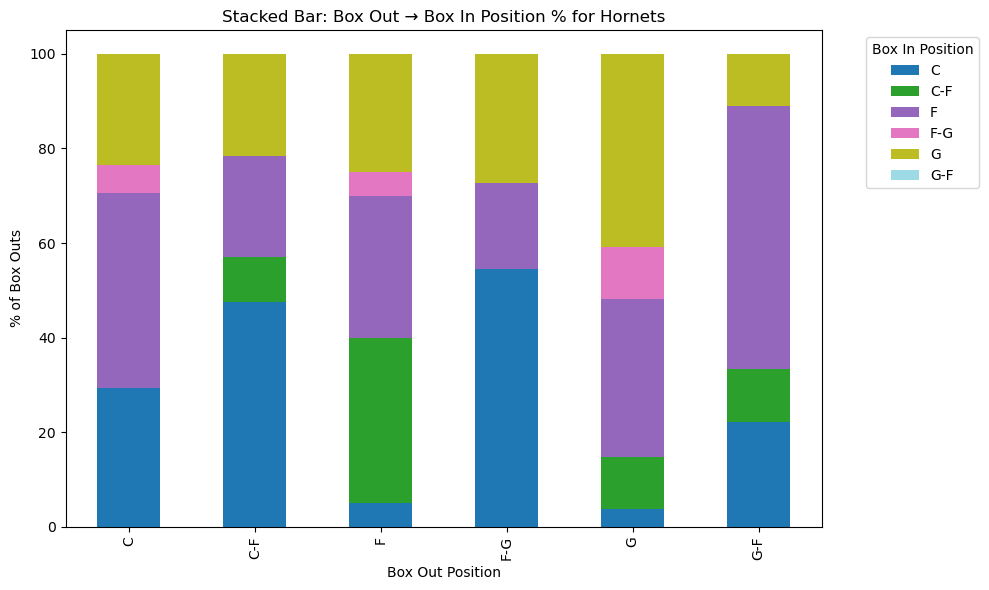

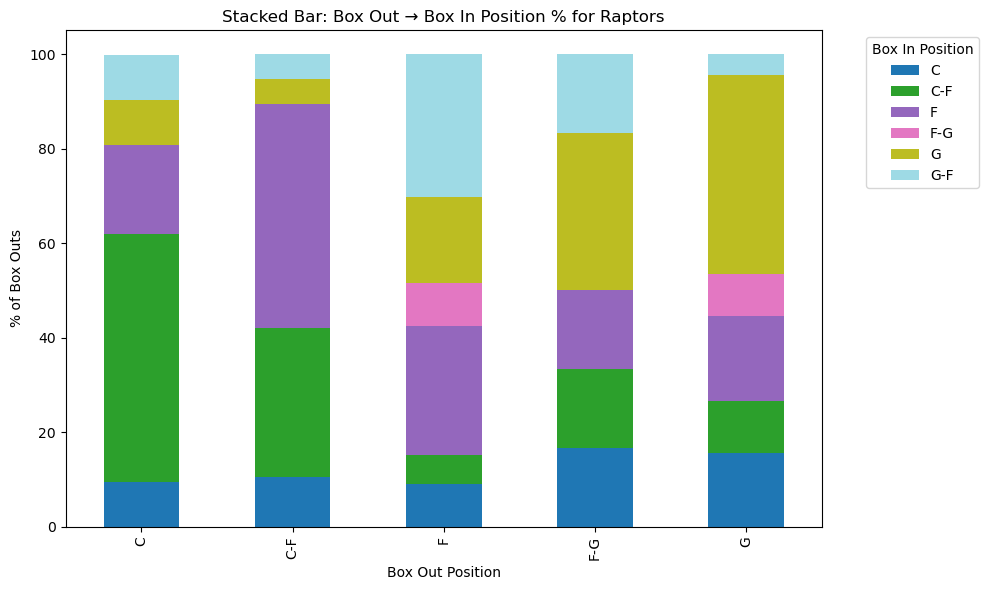

In [522]:
for team in pivot_boxer.index.get_level_values(0).unique():
    team_data = pivot_boxer.loc[team]
    team_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
    
    plt.title(f"Stacked Bar: Box Out → Box In Position % for {team}")
    plt.ylabel("% of Box Outs")
    plt.xlabel("Box Out Position")
    plt.legend(title="Box In Position", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [523]:
target_counts = box_out_df.groupby(['Target Team Name', 'Target Position', 'Boxer Position']).size().reset_index(name='Count')

# Total per team+target position
target_totals = target_counts.groupby(['Target Team Name', 'Target Position'])['Count'].transform('sum')

# Add percentage column
target_counts['Percentage'] = (target_counts['Count'] / target_totals) * 100

# Pivot table
pivot_target = target_counts.pivot_table(
    index=['Target Team Name', 'Target Position'],
    columns='Boxer Position',
    values='Percentage',
    fill_value=0,
    aggfunc='first'
).round(1)

pivot_target

Boxer Position                       C   C-F     F   F-G     G   G-F
Target Team Name Target Position                                    
Hornets          C                11.8  23.5  17.6   5.9  41.2   0.0
                 C-F              35.5  38.7   6.5   3.2  16.1   0.0
                 F                10.0  45.0  22.5   2.5  20.0   0.0
                 F-G               0.0   0.0  42.9   0.0  57.1   0.0
                 G                 6.5   6.5  19.4   6.5  61.3   0.0
                 G-F              11.8  11.8  58.8   5.9  11.8   0.0
Raptors          C                13.9  55.6   5.6  16.7   2.8   5.6
                 C-F               0.0  18.2  63.6   0.0  13.6   4.5
                 F                15.9  20.5  27.3   4.5  20.5  11.4
                 F-G              16.7   0.0  33.3   0.0  50.0   0.0
                 G                10.5  23.7  26.3   7.9  28.9   2.6

In [524]:
hornets = pivot_target.loc['Hornets']
raptors = pivot_target.loc['Raptors']

# Subtract Raptors from Hornets
diff = hornets - raptors
diff

Boxer Position,C,C-F,F,F-G,G,G-F
Target Position,,,,,,
C,-2.1,-32.1,12.0,-10.8,38.4,-5.6
C-F,35.5,20.5,-57.1,3.2,2.5,-4.5
F,-5.9,24.5,-4.8,-2.0,-0.5,-11.4
F-G,-16.7,0.0,9.6,0.0,7.1,0.0
G,-4.0,-17.2,-6.9,-1.4,32.4,-2.6
G-F,NaN,NaN,NaN,NaN,NaN,NaN


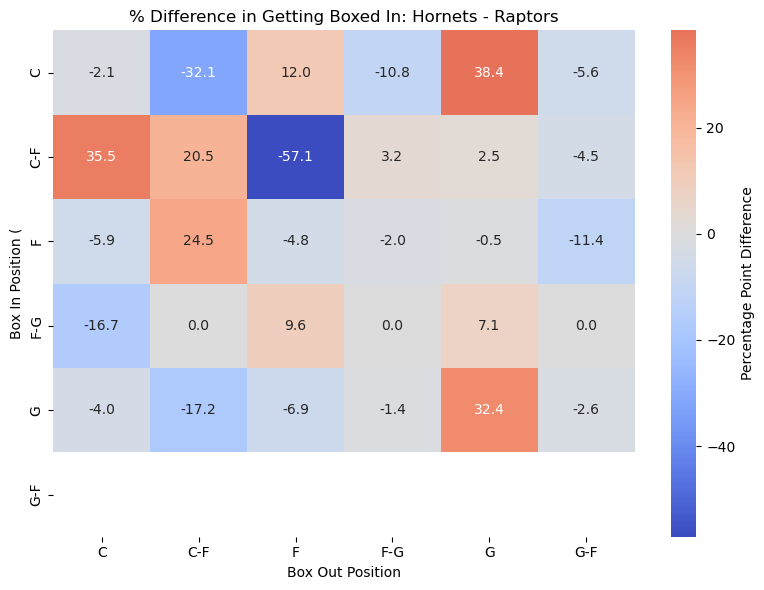

In [525]:
plt.figure(figsize=(8, 6))
sns.heatmap(
        diff,
        annot=True,
        cmap="coolwarm",
        center=0,
        fmt=".1f",
        cbar_kws={'label': 'Percentage Point Difference'}
    )
plt.title(f"% Difference in Getting Boxed In: {team1} - {team2}")
plt.xlabel("Box Out Position")
plt.ylabel("Box In Position (")
plt.tight_layout()
plt.show()

#Negative good for hornets

/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/3549984339.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


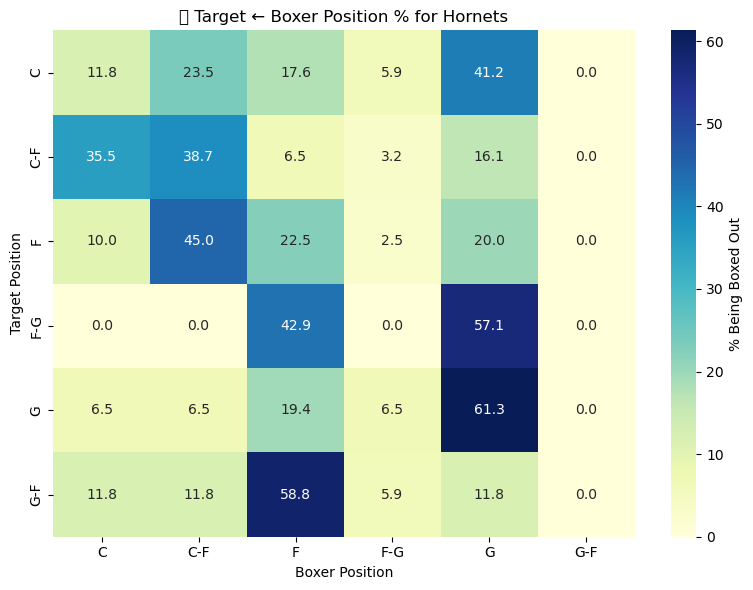

/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/3549984339.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


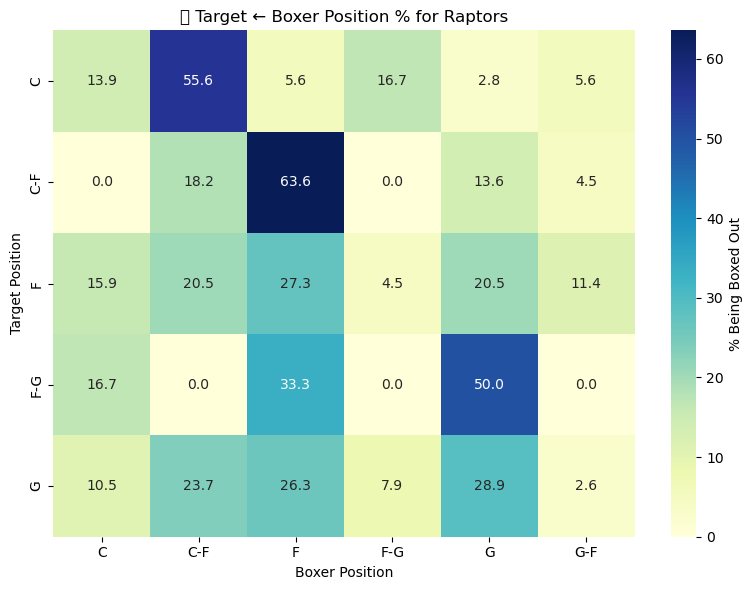

In [526]:
for team in pivot_target.index.get_level_values(0).unique():
    team_data = pivot_target.loc[team]

    plt.figure(figsize=(8, 6))
    sns.heatmap(team_data, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': '% Being Boxed Out'})
    plt.title(f"🔥 Target ← Boxer Position % for {team}")
    plt.xlabel("Boxer Position")
    plt.ylabel("Target Position")
    plt.tight_layout()
    plt.show()


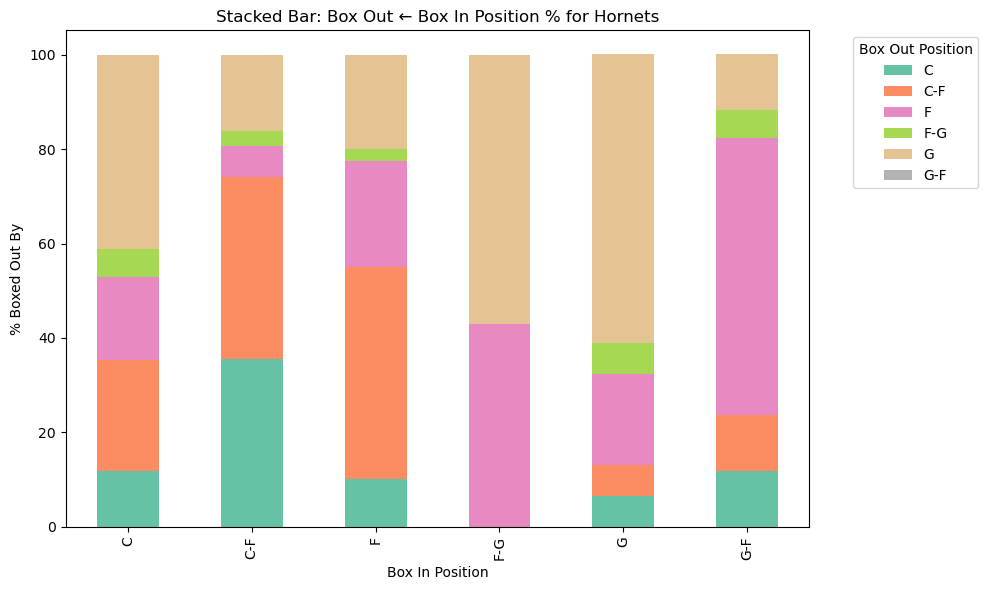

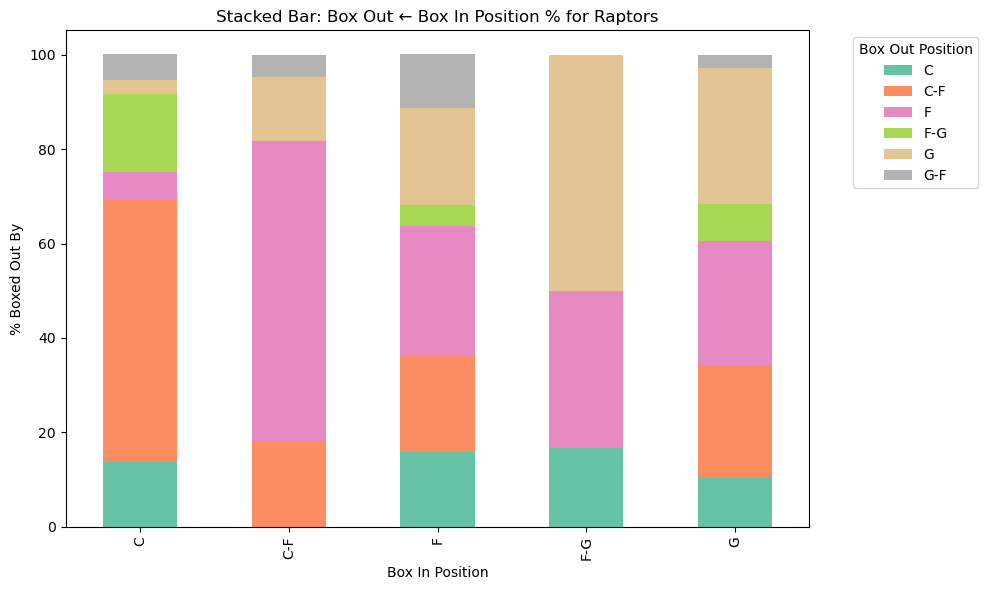

In [527]:
for team in pivot_target.index.get_level_values(0).unique():
    team_data = pivot_target.loc[team]
    team_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

    plt.title(f"Stacked Bar: Box Out ← Box In Position % for {team}")
    plt.ylabel("% Boxed Out By")
    plt.xlabel("Box In Position")
    plt.legend(title="Box Out Position", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [528]:
pos_box = box_out_df['Boxer Position'].value_counts().rename('Box Out Count')
pos_target = box_out_df['Target Position'].value_counts().rename('Boxed Out Count')

pos_success = pd.concat([pos_box, pos_target], axis=1).fillna(0)
pos_success['Total Events'] = pos_success['Box Out Count'] + pos_success['Boxed Out Count']
pos_success['Box Out Success Rate (%)'] = (pos_success['Box Out Count'] / pos_success['Total Events']) * 100

pos_success = pos_success.reset_index().rename(columns={'index': 'Position'})
pos_success.sort_values('Box Out Success Rate (%)', ascending=False)

,Position,Box Out Count,Boxed Out Count,Total Events,Box Out Success Rate (%)
0,C-F,80,53,133,60.150376
4,F-G,17,13,30,56.666667
2,G,72,69,141,51.063830
1,F,73,84,157,46.496815
3,C,38,53,91,41.758242
5,G-F,9,17,26,34.615385


In [529]:
team_pos_box = box_out_df.groupby(['Boxer Team Name', 'Boxer Position']).size().rename('Box Out Count')
team_pos_target = box_out_df.groupby(['Target Team Name', 'Target Position']).size().rename('Box In Count')

team_pos_success = pd.concat([team_pos_box, team_pos_target], axis=1).fillna(0)
team_pos_success['Total Events'] = team_pos_success['Box Out Count'] + team_pos_success['Box In Count']
team_pos_success['Box Out Success Rate (%)'] = (team_pos_success['Box Out Count'] / team_pos_success['Total Events']) * 100

team_pos_success = team_pos_success.reset_index().rename(columns={
    'level_0': 'Team Name', 'level_1': 'Position'
})
team_pos_success.sort_values('Box Out Success Rate (%)', ascending=False)

,Team Name,Position,Box Out Count,Box In Count,Total Events,Box Out Success Rate (%)
7,Raptors,C-F,38,22,60,63.333333
3,Hornets,F-G,11,7,18,61.111111
1,Hornets,C-F,42,31,73,57.534247
10,Raptors,G,45,38,83,54.216867
0,Hornets,C,17,17,34,50.000000
2,Hornets,F,40,40,80,50.000000
9,Raptors,F-G,6,6,12,50.000000
4,Hornets,G,27,31,58,46.551724
8,Raptors,F,33,44,77,42.857143
6,Raptors,C,21,36,57,36.842105


# Testing changes

In [530]:

test_df = box_out_df.copy()
test_df

,Quarter,Game Clock (s),Basket,Boxer Distance to Basket (ft),Target Distance to Basket (ft),Distance Between Players (ft),Boxer Team Name,Target Team Name,Boxer Name,Target Name,Boxer Position,Target Position,Box Out Side
0,Q1,701.50,Left,4.97,5.34,1.33,Hornets,Raptors,Nicolas Batum,Jonas Valanciunas,G-F,C,Defense
1,Q1,686.03,Right,11.98,12.92,4.58,Raptors,Hornets,Kyle Lowry,Nicolas Batum,G,G-F,Defense
2,Q1,686.03,Right,1.12,5.76,4.74,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C,Offense
3,Q1,667.39,Left,3.44,4.18,1.54,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C,Defense
4,Q1,659.28,Right,9.10,10.96,1.91,Hornets,Raptors,Cody Zeller,Kyle Lowry,C-F,G,Offense
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Q4,20.10,Left,7.25,10.60,4.14,Raptors,Hornets,Jonas Valanciunas,Cody Zeller,C,C-F,Defense
285,Q4,16.30,Right,6.68,8.84,3.42,Hornets,Raptors,Cody Zeller,Jonas Valanciunas,C-F,C,Defense
286,Q4,16.30,Right,6.85,9.32,4.00,Hornets,Raptors,Marvin Williams,Terrence Ross,F,F-G,Defense
287,Q4,6.90,Left,14.49,16.16,2.55,Hornets,Raptors,Marvin Williams,Terrence Ross,F,F-G,Offense


In [531]:
test_df.loc[test_df['Boxer Name'] == 'DeMar DeRozan', 'Boxer Position'] = 'F'

# Condition 2: If 'Target Name' is 'DeMar DeRozan', set 'Target Position' to 'F'
test_df.loc[test_df['Target Name'] == 'DeMar DeRozan', 'Target Position'] = 'F'

def position_change(name, position):
    test_df.loc[test_df['Boxer Name'] == name, 'Boxer Position'] = position

    test_df.loc[test_df['Target Name'] == name, 'Target Position'] = position

In [532]:
test_df["Boxer Name"].unique()

array(['Nicolas Batum', 'Kyle Lowry', 'Cody Zeller', 'Luis Scola',
       'Jonas Valanciunas', 'DeMar DeRozan', 'Marvin Williams',
       'Kemba Walker', 'DeMarre Carroll', 'PJ Hairston', 'Frank Kaminsky',
       'Patrick Patterson', 'Bismack Biyombo', 'Tyler Hansbrough',
       'Brian Roberts', 'Jeremy Lamb', 'Cory Joseph', 'James Johnson',
       'Terrence Ross'], dtype=object)

In [533]:
position_change("Cody Zeller", "C")
position_change("Bismack Biyombo", "C")
position_change("Nicolas Batum", "F")
position_change("DeMar DeRozan", "F")
position_change("PJ Hairston", "F")
position_change("Terrence Ross", "G")

In [534]:
test_df["Boxer Position"].value_counts()

Boxer Position
C    118
F    114
G     57
Name: count, dtype: int64

In [535]:
box_out_df["Boxer Position"].value_counts()

Boxer Position
C-F    80
F      73
G      72
C      38
F-G    17
G-F     9
Name: count, dtype: int64

### Position Comparison

In [536]:
boxer_pos_target_change = test_df.groupby(['Boxer Name', 'Target Position']).size().reset_index(name='count')
most_boxed_position_change = boxer_pos_target_change.sort_values(['Boxer Name', 'count'], ascending=[True, False]) \
    .groupby('Boxer Name').first().reset_index()
most_boxed_position_change = most_boxed_position_change.rename(columns={
    'Target Position': 'Most Boxed Target Position',
    'count': 'Boxed Target Count'
})
most_boxed_position_change

,Boxer Name,Most Boxed Target Position,Boxed Target Count
0,Bismack Biyombo,F,20
1,Brian Roberts,G,3
2,Cody Zeller,C,24
3,Cory Joseph,G,6
4,DeMar DeRozan,F,10
5,DeMarre Carroll,F,6
6,Frank Kaminsky,F,9
7,James Johnson,F,2
8,Jeremy Lamb,G,4
9,Jonas Valanciunas,C,13


In [537]:
target_pos_boxer_change = test_df.groupby(['Target Name', 'Boxer Position']).size().reset_index(name='count')
most_boxed_by_position_change = target_pos_boxer_change.sort_values(['Target Name', 'count'], ascending=[True, False]) \
    .groupby('Target Name').first().reset_index()
most_boxed_by_position_change = most_boxed_by_position_change.rename(columns={
    'Target Name': 'Player Name',
    'Boxer Position': 'Most Frequent Boxer Position',
    'count': 'Boxed By Count'
})
most_boxed_by_position_change

,Player Name,Most Frequent Boxer Position,Boxed By Count
0,Bismack Biyombo,F,15
1,Brian Roberts,C,1
2,Cody Zeller,C,23
3,Cory Joseph,C,3
4,DeMar DeRozan,F,8
5,DeMarre Carroll,C,8
6,Frank Kaminsky,G,7
7,James Johnson,F,2
8,Jeremy Lamb,G,8
9,Jonas Valanciunas,C,25


In [538]:
player_position_summary_change = pd.merge(
    most_boxed_position_change, 
    most_boxed_by_position_change, 
    left_on='Boxer Name', 
    right_on='Player Name', 
    how='outer'
)

# Clean up column order
player_position_summary_change = player_position_summary_change[[
    'Boxer Name', 'Most Boxed Target Position', 'Boxed Target Count',
    'Most Frequent Boxer Position', 'Boxed By Count'
]]

# Fill NaNs for players that only boxed or were only targets
player_position_summary_change = player_position_summary_change.fillna({
    'Most Boxed Target Position': '—',
    'Boxed Target Count': 0,
    'Most Frequent Boxer Position': '—',
    'Boxed By Count': 0
})

player_position_summary_change

,Boxer Name,Most Boxed Target Position,Boxed Target Count,Most Frequent Boxer Position,Boxed By Count
0,Bismack Biyombo,F,20,F,15
1,Brian Roberts,G,3,C,1
2,Cody Zeller,C,24,C,23
3,Cory Joseph,G,6,C,3
4,DeMar DeRozan,F,10,F,8
5,DeMarre Carroll,F,6,C,8
6,Frank Kaminsky,F,9,G,7
7,James Johnson,F,2,F,2
8,Jeremy Lamb,G,4,G,8
9,Jonas Valanciunas,C,13,C,25


In [539]:
boxer_counts_change = test_df['Boxer Name'].value_counts().rename('Box Out Count')
target_counts_change = test_df['Target Name'].value_counts().rename('Boxed Out Count')

# Combine
player_success_change = pd.concat([boxer_counts_change, target_counts_change], axis=1).fillna(0)
player_success_change['Total Events'] = player_success_change['Box Out Count'] + player_success_change['Boxed Out Count']
player_success_change['Box Out Success Rate (%)'] = (player_success_change['Box Out Count'] / player_success_change['Total Events']) * 100

# Get player position
boxer_positions_change = test_df.groupby('Boxer Name')['Boxer Position'].agg(lambda x: x.mode().iloc[0])
target_positions_change = test_df.groupby('Target Name')['Target Position'].agg(lambda x: x.mode().iloc[0])
player_positions_change = boxer_positions_change.combine_first(target_positions_change)
player_success_change = player_success_change.merge(player_positions_change.rename('Player Position'), left_index=True, right_index=True)

# Reset index
player_success_change = player_success_change.reset_index().rename(columns={'index': 'Player Name'})
player_success_change.sort_values('Box Out Success Rate (%)', ascending=False)

,Player Name,Box Out Count,Boxed Out Count,Total Events,Box Out Success Rate (%),Player Position
1,Bismack Biyombo,38,22,60,63.333333,C
17,Brian Roberts,5,3,8,62.500000,G
4,DeMar DeRozan,21,13,34,61.764706,F
10,PJ Hairston,11,7,18,61.111111,F
0,Cody Zeller,42,31,73,57.534247,C
2,Marvin Williams,22,17,39,56.410256,F
11,Cory Joseph,11,9,20,55.000000,G
6,Frank Kaminsky,17,17,34,50.000000,C
7,Kemba Walker,14,14,28,50.000000,G
16,Terrence Ross,6,6,12,50.000000,G


In [540]:
position_boxing_change = test_df.groupby(['Boxer Position', 'Target Position']).size().reset_index(name='count')

# Normalize by Boxer Position (what % of G's box outs are against C, etc.)
position_boxing_change['pct_of_boxer_pos'] = position_boxing_change.groupby('Boxer Position')['count'].transform(lambda x: x / x.sum())

position_boxing_change.sort_values("count", ascending=False)

,Boxer Position,Target Position,count,pct_of_boxer_pos
4,F,F,59,0.517544
0,C,C,58,0.491525
1,C,F,47,0.398305
3,F,C,35,0.307018
8,G,G,29,0.508772
5,F,G,20,0.175439
7,G,F,15,0.263158
2,C,G,13,0.110169
6,G,C,13,0.228070


In [541]:
most_common_target_pos_change = position_boxing_change.sort_values(['Boxer Position', 'count'], ascending=[True, False])\
    .groupby('Boxer Position').first().reset_index()
most_common_target_pos_change

,Boxer Position,Target Position,count,pct_of_boxer_pos
0,C,C,58,0.491525
1,F,F,59,0.517544
2,G,G,29,0.508772


In [542]:
position_getting_boxed_change = test_df.groupby(['Target Position', 'Boxer Position']).size().reset_index(name='count')
position_getting_boxed_change['pct_of_target_pos'] = position_getting_boxed_change.groupby('Target Position')['count'].transform(lambda x: x / x.sum())

most_common_boxer_pos_change = position_getting_boxed_change.sort_values(['Target Position', 'count'], ascending=[True, False])\
    .groupby('Target Position').first().reset_index()

most_common_boxer_pos_change

,Target Position,Boxer Position,count,pct_of_target_pos
0,C,C,58,0.547170
1,F,F,59,0.487603
2,G,G,29,0.467742


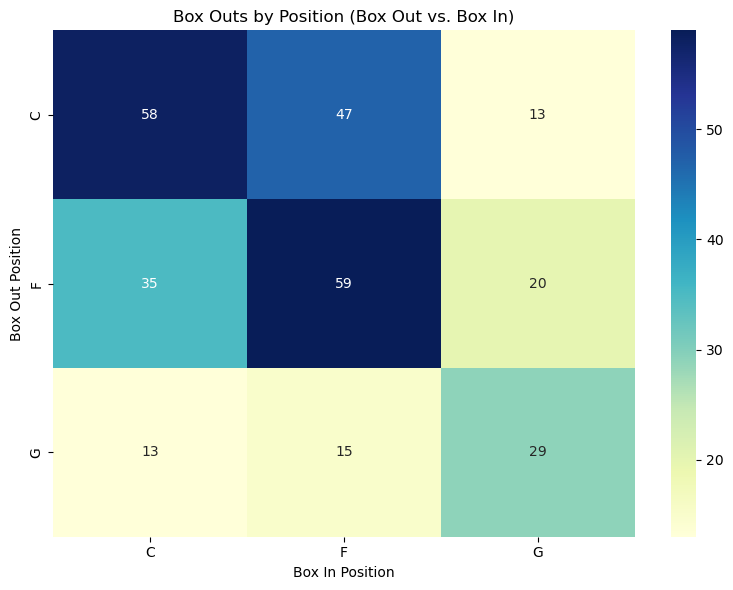

In [543]:
pivot_table_change = position_boxing_change.pivot(index="Boxer Position", columns="Target Position", values="count").fillna(0)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_change, annot=True, fmt="g", cmap="YlGnBu")
plt.title("Box Outs by Position (Box Out vs. Box In)")
plt.xlabel("Box In Position")
plt.ylabel("Box Out Position")
plt.tight_layout()
plt.show()

In [544]:
box_counts_change = test_df.groupby(['Boxer Team Name', 'Boxer Position', 'Target Position']).size().reset_index(name='Count')

# Total per team+boxer position
box_totals_change = box_counts_change.groupby(['Boxer Team Name', 'Boxer Position'])['Count'].transform('sum')

# Add percentage column
box_counts_change['Percentage'] = (box_counts_change['Count'] / box_totals_change) * 100

# Pivot table
pivot_boxer_change = box_counts_change.pivot_table(
    index=['Boxer Team Name', 'Boxer Position'],
    columns='Target Position',
    values='Percentage',
    fill_value=0,
    aggfunc='first'
).round(1)

pivot_boxer_change

Target Position                    C     F     G
Boxer Team Name Boxer Position                  
Hornets         C               49.2  35.6  15.3
                F               41.7  45.0  13.3
                G               14.8  33.3  51.9
Raptors         C               49.2  44.1   6.8
                F               18.5  59.3  22.2
                G               30.0  20.0  50.0

In [545]:
hornets = pivot_boxer_change.loc['Hornets']
raptors = pivot_boxer_change.loc['Raptors']

# Subtract Raptors from Hornets
diff = hornets - raptors
diff



Target Position,C,F,G
Boxer Position,,,
C,0.0,-8.5,8.5
F,23.2,-14.3,-8.9
G,-15.2,13.3,1.9


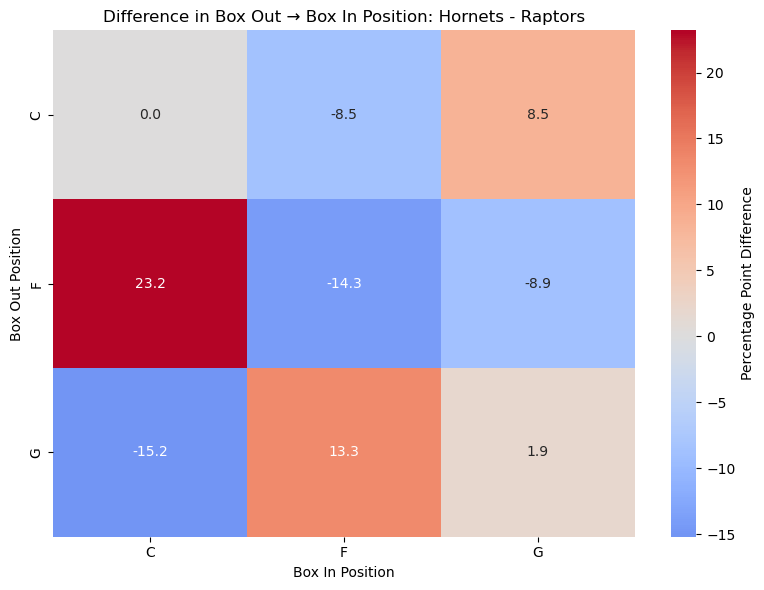

In [546]:

plt.figure(figsize=(8, 6))
sns.heatmap(diff, annot=True, cmap="coolwarm", center=0, fmt=".1f", cbar_kws={'label': 'Percentage Point Difference'})
plt.title(f"Difference in Box Out → Box In Position: {team1} - {team2}")
plt.xlabel("Box In Position")
plt.ylabel("Box Out Position")
plt.tight_layout()
plt.show()

#Positive good for Hornets

/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/1740459803.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


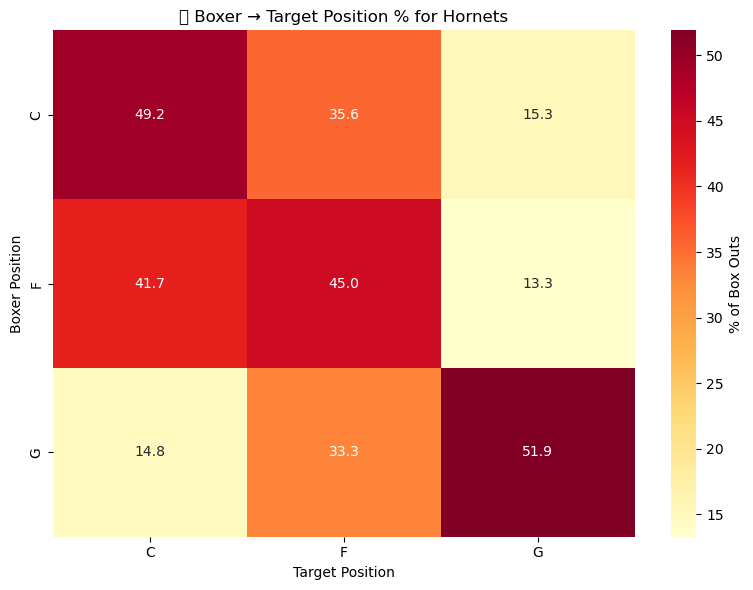

/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/1740459803.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


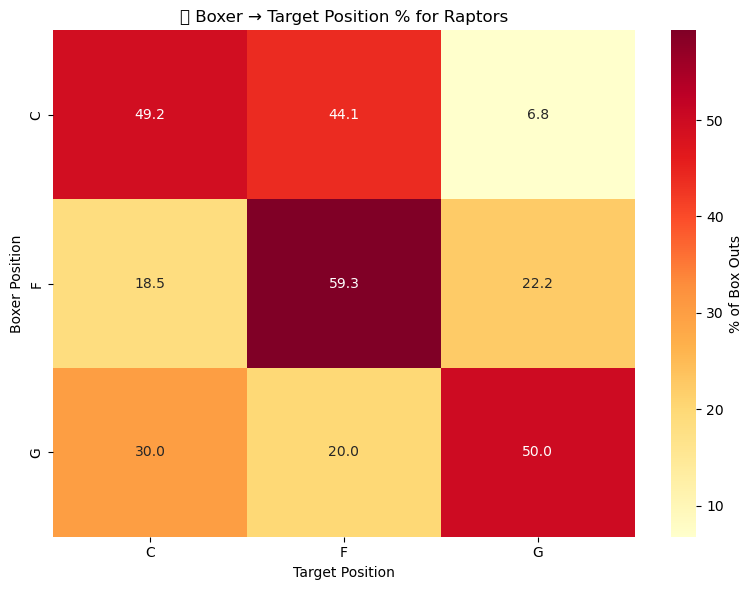

In [547]:
for team in pivot_boxer_change.index.get_level_values(0).unique():
    team_data = pivot_boxer_change.loc[team]

    plt.figure(figsize=(8, 6))
    sns.heatmap(team_data, annot=True, cmap="YlOrRd", fmt=".1f", cbar_kws={'label': '% of Box Outs'})
    plt.title(f"🔥 Boxer → Target Position % for {team}")
    plt.xlabel("Target Position")
    plt.ylabel("Boxer Position")
    plt.tight_layout()
    plt.show()

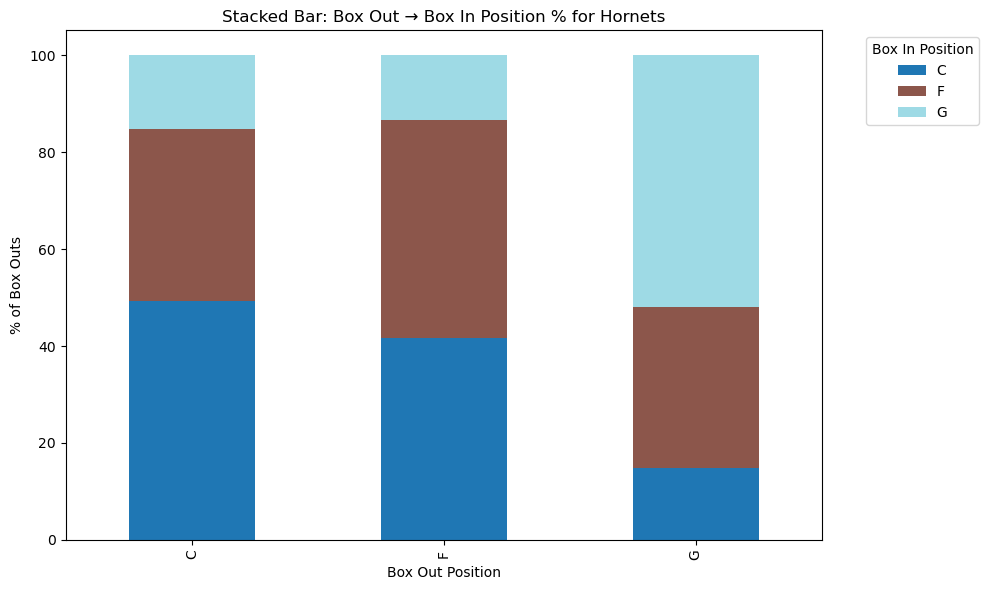

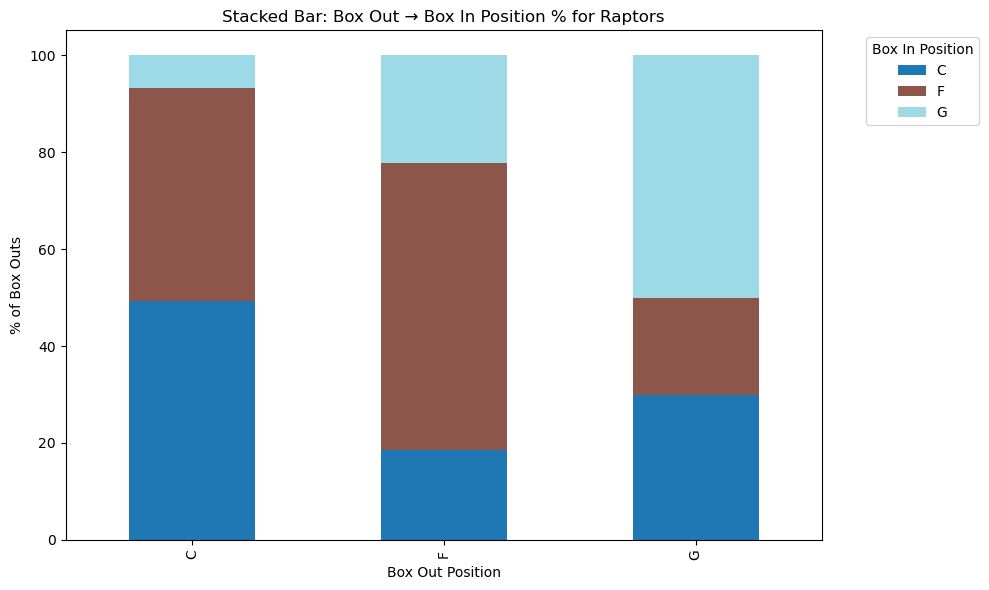

In [548]:
for team in pivot_boxer_change.index.get_level_values(0).unique():
    team_data = pivot_boxer_change.loc[team]
    team_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
    
    plt.title(f"Stacked Bar: Box Out → Box In Position % for {team}")
    plt.ylabel("% of Box Outs")
    plt.xlabel("Box Out Position")
    plt.legend(title="Box In Position", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [549]:
target_counts_change = test_df.groupby(['Target Team Name', 'Target Position', 'Boxer Position']).size().reset_index(name='Count')

# Total per team+target position
target_totals_change = target_counts_change.groupby(['Target Team Name', 'Target Position'])['Count'].transform('sum')

# Add percentage column
target_counts_change['Percentage'] = (target_counts_change['Count'] / target_totals_change) * 100

# Pivot table
pivot_target_change = target_counts_change.pivot_table(
    index=['Target Team Name', 'Target Position'],
    columns='Boxer Position',
    values='Percentage',
    fill_value=0,
    aggfunc='first'
).round(1)

pivot_target_change

Boxer Position                       C     F     G
Target Team Name Target Position                  
Hornets          C                60.4  20.8  18.8
                 F                40.6  50.0   9.4
                 G                12.9  38.7  48.4
Raptors          C                50.0  43.1   6.9
                 F                36.8  47.4  15.8
                 G                29.0  25.8  45.2

In [550]:
hornets = pivot_target_change.loc['Hornets']
raptors = pivot_target_change.loc['Raptors']

# Subtract Raptors from Hornets
diff = hornets - raptors
diff


Boxer Position,C,F,G
Target Position,,,
C,10.4,-22.3,11.9
F,3.8,2.6,-6.4
G,-16.1,12.9,3.2


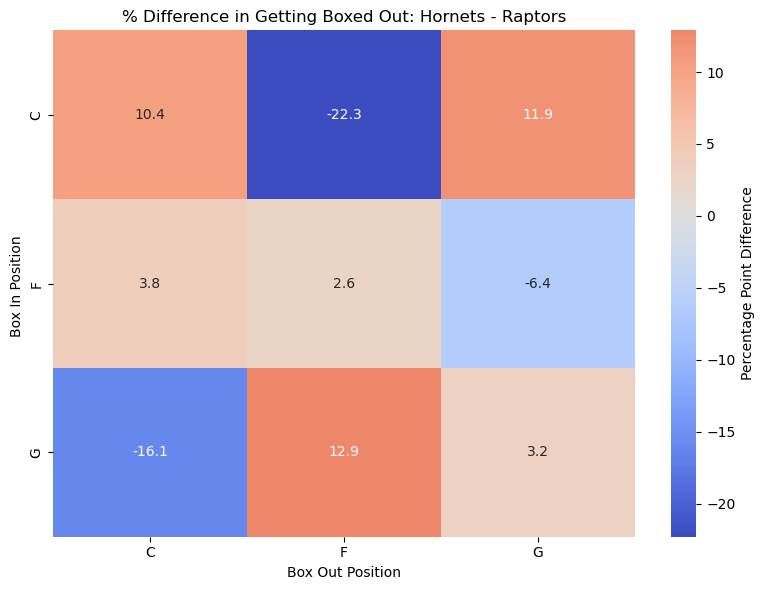

In [551]:

plt.figure(figsize=(8, 6))
sns.heatmap(
        diff,
        annot=True,
        cmap="coolwarm",
        center=0,
        fmt=".1f",
        cbar_kws={'label': 'Percentage Point Difference'}
    )
plt.title(f"% Difference in Getting Boxed Out: {team1} - {team2}")
plt.xlabel("Box Out Position")
plt.ylabel("Box In Position ")
plt.tight_layout()
plt.show()

#Negative good for hornets

In [552]:
teams = pivot_target_change.index.get_level_values(0).unique()

if len(teams) == 2:
    team1, team2 = teams

    # Flip perspective: target is now the one being boxed out
    # So we regroup: target = index, boxer = columns

    # Step 1: Extract each team’s section
    pivot_team1_boxed = pivot_target_change.loc[team1].T  # Transpose: Boxer Pos ↔ Target Pos
    pivot_team2_boxed = pivot_target_change.loc[team2].T

    # Step 2: Get all positions from both teams for index and columns
    target_positions = sorted(set(pivot_team1_boxed.index).union(set(pivot_team2_boxed.index)))
    boxer_positions = sorted(set(pivot_team1_boxed.columns).union(set(pivot_team2_boxed.columns)))

    # Step 3: Reindex to align
    pivot_team1_boxed = pivot_team1_boxed.reindex(index=target_positions, columns=boxer_positions).fillna(0)
    pivot_team2_boxed = pivot_team2_boxed.reindex(index=target_positions, columns=boxer_positions).fillna(0)

    # Step 4: Subtract (team1 - team2)
    difference_pivot_boxed_change = (pivot_team1_boxed - pivot_team2_boxed).round(1)


difference_pivot_boxed_change


Target Position,C,F,G
Boxer Position,,,
C,10.4,3.8,-16.1
F,-22.3,2.6,12.9
G,11.9,-6.4,3.2


/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/245867677.py:13: UserWarning: Glyph 128737 (\N{SHIELD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128737 (\N{SHIELD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


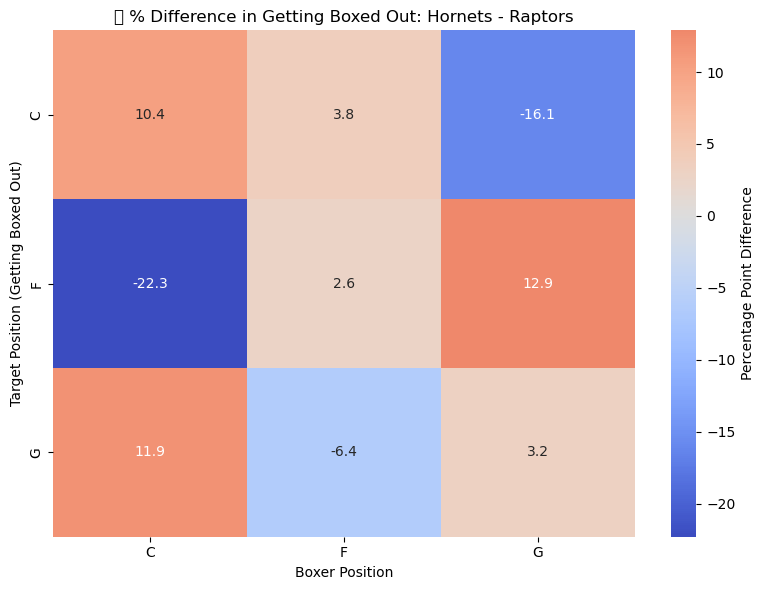

In [553]:
plt.figure(figsize=(8, 6))
sns.heatmap(
        difference_pivot_boxed_change,
        annot=True,
        cmap="coolwarm",
        center=0,
        fmt=".1f",
        cbar_kws={'label': 'Percentage Point Difference'}
    )
plt.title(f"🛡️ % Difference in Getting Boxed Out: {team1} - {team2}")
plt.xlabel("Boxer Position")
plt.ylabel("Target Position (Getting Boxed Out)")
plt.tight_layout()
plt.show()

/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/3783161239.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


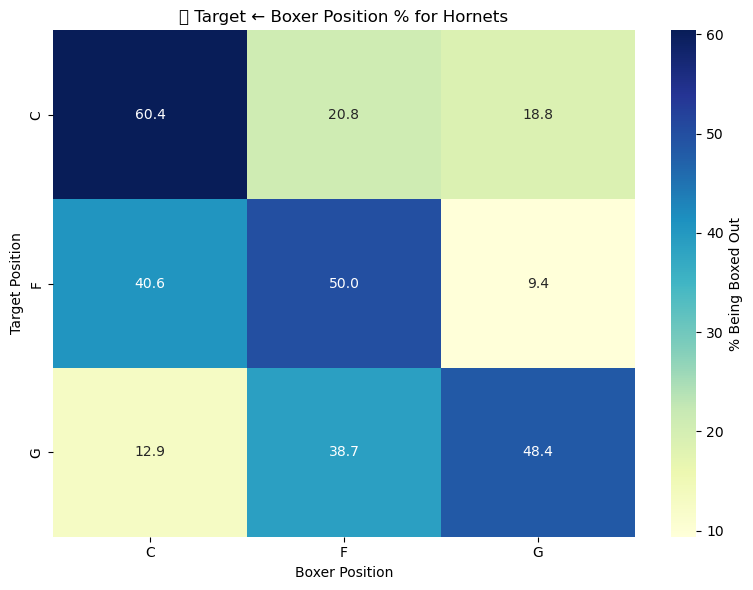

/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/3783161239.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


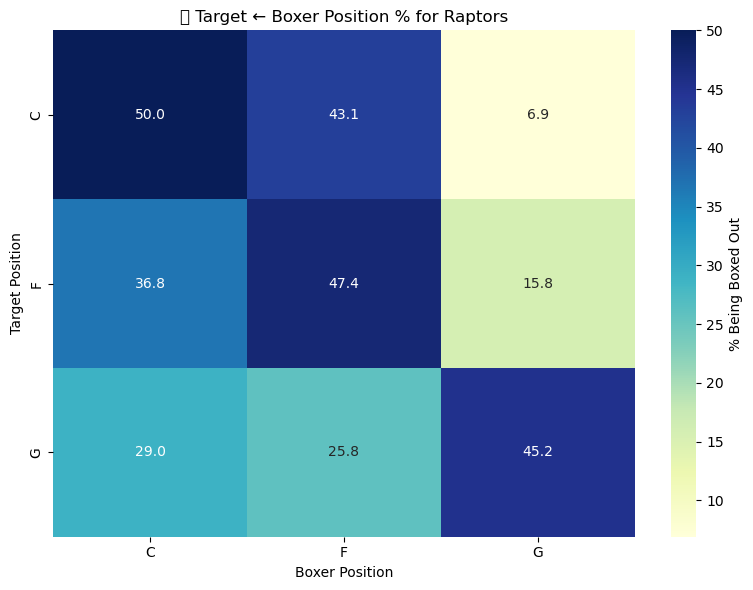

In [554]:
for team in pivot_target_change.index.get_level_values(0).unique():
    team_data = pivot_target_change.loc[team]

    plt.figure(figsize=(8, 6))
    sns.heatmap(team_data, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': '% Being Boxed Out'})
    plt.title(f"🔥 Target ← Boxer Position % for {team}")
    plt.xlabel("Boxer Position")
    plt.ylabel("Target Position")
    plt.tight_layout()
    plt.show()


/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/4172762186.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


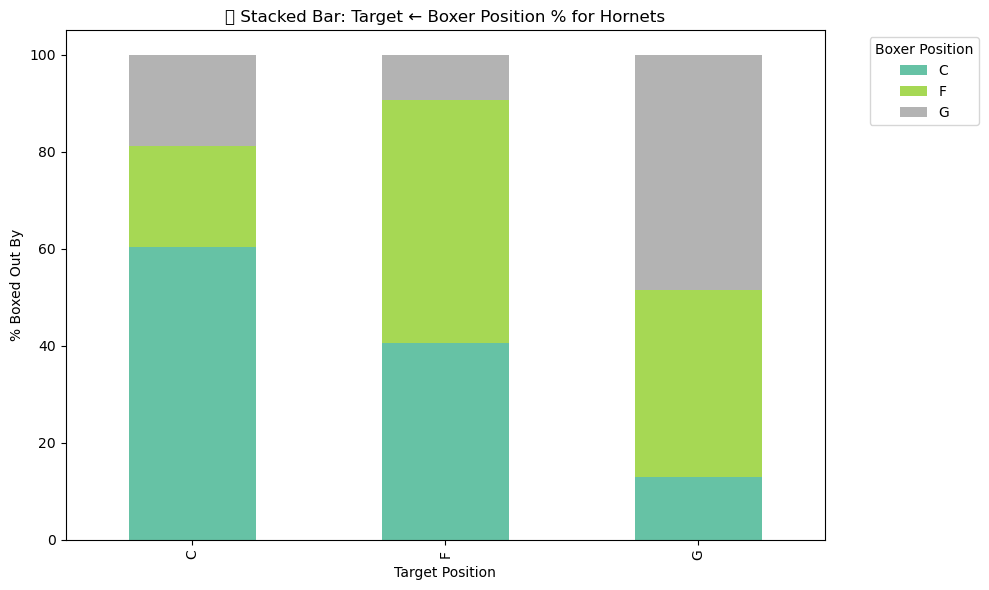

/var/folders/28/k_06cnf50jv837zrzkdd_xxc0000gn/T/ipykernel_3242/4172762186.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/adriankong/miniforge3/envs/dsc80/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


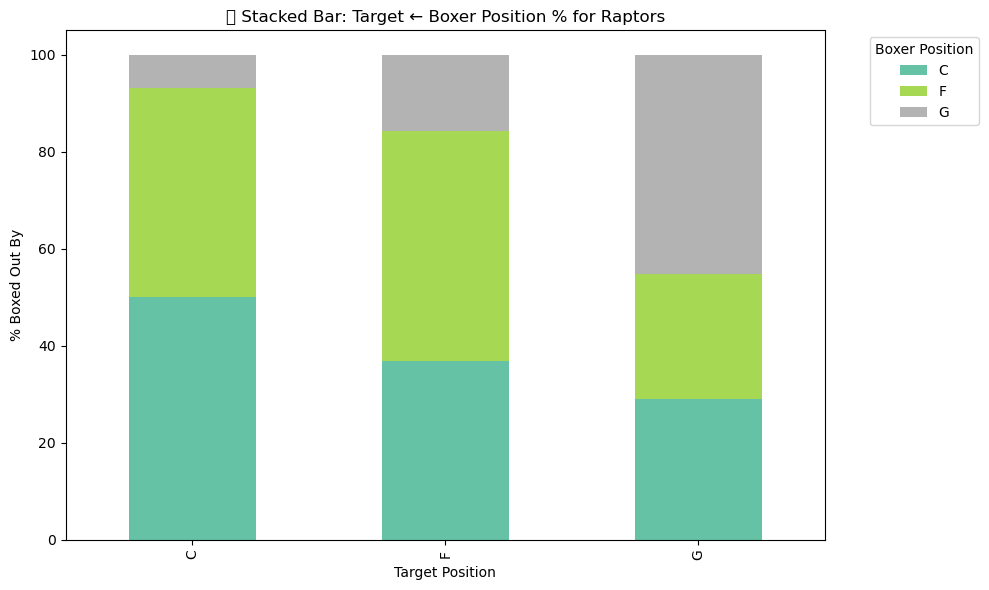

In [555]:
for team in pivot_target_change.index.get_level_values(0).unique():
    team_data = pivot_target_change.loc[team]
    team_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

    plt.title(f"📊 Stacked Bar: Target ← Boxer Position % for {team}")
    plt.ylabel("% Boxed Out By")
    plt.xlabel("Target Position")
    plt.legend(title="Boxer Position", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [556]:
pos_box_change = test_df['Boxer Position'].value_counts().rename('Box Out Count')
pos_target_change = test_df['Target Position'].value_counts().rename('Boxed Out Count')

pos_success_change = pd.concat([pos_box_change, pos_target_change], axis=1).fillna(0)
pos_success_change['Total Events'] = pos_success_change['Box Out Count'] + pos_success_change['Boxed Out Count']
pos_success_change['Box Out Success Rate (%)'] = (pos_success_change['Box Out Count'] / pos_success_change['Total Events']) * 100

pos_success_change = pos_success_change.reset_index().rename(columns={'index': 'Position'})
pos_success_change.sort_values('Box Out Success Rate (%)', ascending=False)

,Position,Box Out Count,Boxed Out Count,Total Events,Box Out Success Rate (%)
0,C,118,106,224,52.678571
1,F,114,121,235,48.510638
2,G,57,62,119,47.899160


In [557]:
team_pos_box_change = test_df.groupby(['Boxer Team Name', 'Boxer Position']).size().rename('Box Out Count')
team_pos_target_change = test_df.groupby(['Target Team Name', 'Target Position']).size().rename('Boxed Out Count')

team_pos_success_change = pd.concat([team_pos_box_change, team_pos_target_change], axis=1).fillna(0)
team_pos_success_change['Total Events'] = team_pos_success_change['Box Out Count'] + team_pos_success_change['Boxed Out Count']
team_pos_success_change['Box Out Success Rate (%)'] = (team_pos_success_change['Box Out Count'] / team_pos_success_change['Total Events']) * 100

team_pos_success_change = team_pos_success_change.reset_index().rename(columns={
    'level_0': 'Team Name', 'level_1': 'Position'
})
team_pos_success_change.sort_values('Box Out Success Rate (%)', ascending=False)

,Team Name,Position,Box Out Count,Boxed Out Count,Total Events,Box Out Success Rate (%)
0,Hornets,C,59,48,107,55.140187
3,Raptors,C,59,58,117,50.427350
5,Raptors,G,30,31,61,49.180328
4,Raptors,F,54,57,111,48.648649
1,Hornets,F,60,64,124,48.387097
2,Hornets,G,27,31,58,46.551724
